In [ ]:
using LinearAlgebra
using Random
using Plots
gr()

In [12]:
using Random

In [19]:
idx_list = reshape(collect(Iterators.product(1:10, 1:3)), 30, :)
shuffle!(idx_list);

In [30]:
idx_list[1:3]

3-element Array{Tuple{Int64,Int64},1}:
 (7, 3)
 (1, 2)
 (10, 1)

In [31]:
A = fill(5, 3, 3)

3×3 Array{Int64,2}:
 5  5  5
 5  5  5
 5  5  5

In [35]:
setindex!(A, 0, (1, 1)...)

3×3 Array{Int64,2}:
 0  5  5
 5  5  5
 5  5  5

$
\begin{align}
\underset{n \times k_c}{C} \cdot \underset{k_c \times k_m}{F} &= \underset{n \times k_m}{M} \\
C^\intercal C \cdot F &= C^\intercal M \\
F &= \overbrace{\underset{k_c \times k_c}{(C^\intercal C) ^ {-1}} \underset{k_c \times n}{C^\intercal}}^{\textrm{pseudoinverse}} M \\
%
C \cdot \overbrace{C^{+} M}^{F} &= 
\overbrace{C C^{+}}^{\tilde{I}} \cdot M = 
\overbrace{
    \underset{n \times k_c}{C} \cdot \underset{k_c \times k_c}{(C^\intercal C) ^ {-1}} 
    \underset{k_c \times n}{C^\intercal}}^{\tilde{I} \textrm{ is an identity if M is full row rank}} 
    M = \hat{M}
\end{align}
$

* if $\tilde{I}$ is an identity matrix, the mapping to M would be exact; otherwise, $\hat{M}$ would be a linear combinations of noises presented in $\tilde{I}$
* To alleviate the noise, M could be sparse. A sparse matrix would be resistant to the noise in the $\tilde{I}$

In [46]:
function make_zero(A, idx_list)
    for idx = idx_list
        setindex!(A, 0, idx...)
    end
end

function make_matrix(n, k; sparseness=0)
    idx_list = reshape(collect(Iterators.product(1:n, 1:k)), n*k, 1)
    shuffle!(idx_list)
    sub_list = idx_list[1:Int(length(idx_list) * sparseness), 1]
    A = rand(n, k)
    make_zero(A, sub_list)
    return A
end

make_matrix (generic function with 1 method)

In [48]:
N = 3000;
C = make_matrix(N, 100, sparseness = 0);
S = make_matrix(N, 100, sparseness = 0);

┌ Info: Saved animation to 
│   fn = H:\pinv_fps15.gif
└ @ Plots C:\Users\seantyh\.julia\packages\Plots\XbAWb\src\animation.jl:104


Plots.AnimatedGif("H:\\pinv_fps15.gif")
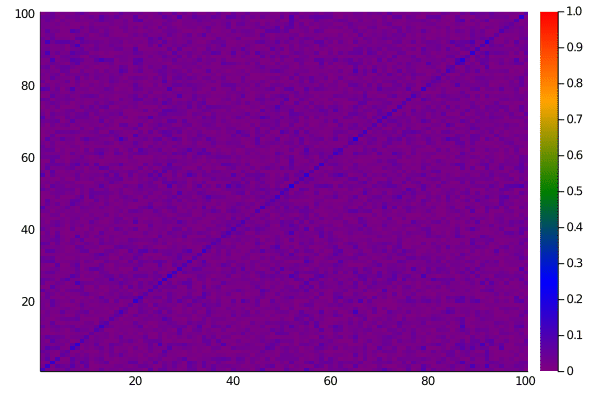

In [139]:
anim = @animate for k = 10:100
    A = rand(100, k)
    A2 = A * pinv(A)
    heatmap(abs.(A2), clims=(0,1), c=:rainbow)
end
gif(anim, "pinv_fps15.gif", fps=15)

In [111]:
norms

91-element Array{Float64,1}:
   9.999999999999998
  11.0
  11.999999999999993
  13.000000000000007
  14.000000000000004
  14.999999999999998
  16.00000000000001
  16.999999999999993
  18.0
  19.000000000000014
  19.999999999999993
  21.000000000000025
  21.99999999999999
   ⋮
  89.00000000000006
  90.00000000000007
  91.0
  91.99999999999999
  93.00000000000003
  93.99999999999999
  95.00000000000001
  95.99999999999997
  96.99999999999996
  97.99999999999996
  99.0
 100.00000000000001

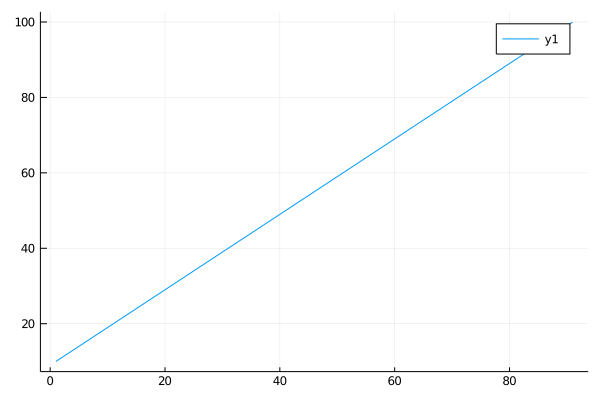

In [112]:
plot(norms)